# Notebook to Classify and Detect Road Damages Using Yolov4 (Google Colab)


## Mount your Drive

In [1]:
cd ~/project/PortUAV

/home/dmsai4/project/PortUAV


## Download AlexeyAB Repository

In [2]:
# clone darknet repo, if not already cloned
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [3]:
cd darknet

/home/dmsai4/project/PortUAV/darknet


In [4]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [5]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [6]:
# make darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (i

## Helper Functions

In [10]:
import cv2
#import files
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def imShow(path):
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

def upload():
    uploaded = files.upload() 
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
            print('saved file', name)
  
def download(path):
    files.download(path)

## Check GPU Version

In [12]:
!nvidia-smi

Wed Apr 19 16:35:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   23C    P8     5W / 350W |     20MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Start the Training 

In [13]:
cd darknet

[Errno 20] Not a directory: 'darknet'
/home/dmsai4/project/PortUAV/darknet


In [14]:
!./darknet detector train /home/dmsai4/project/PortUAV/configs/obj.data /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg /home/dmsai4/project/PortUAV/configs/yolov4.conv.137 -dont_show -map

 CUDA-version: 11010 (11040), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0

 Error: There is no ~/project/PortUAV/configs/test.txt file for mAP calculation!
 Don't use -map flag.
 Or set valid=~/project/PortUAV/configs/train.txt in your /home/dmsai4/project/PortUAV/configs/obj.data file. 
^C


In [20]:
!./darknet detector train /home/dmsai4/project/PortUAV/configs/obj.data /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg /home/dmsai4/project/PortUAV/training/yolov4-custom_last.weights -dont_show -map

 CUDA-version: 11010 (11040), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer:

## Check your Final MAP for your model

In [21]:
!./darknet detector map /home/dmsai4/project/PortUAV/configs/obj.data /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg /home/dmsai4/project/PortUAV/training/yolov4-custom_last.weights

 CUDA-version: 11010 (11040), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003

## Testing your Trained Model

In [22]:
cd cfg

/home/dmsai4/project/PortUAV/darknet/cfg


In [24]:
# need to set our custom cfg to test mode 
!sed -i 's/batch=64/batch=1/' /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg

In [25]:
cd ..

/home/dmsai4/project/PortUAV/darknet


 CUDA-version: 11010 (11040), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 

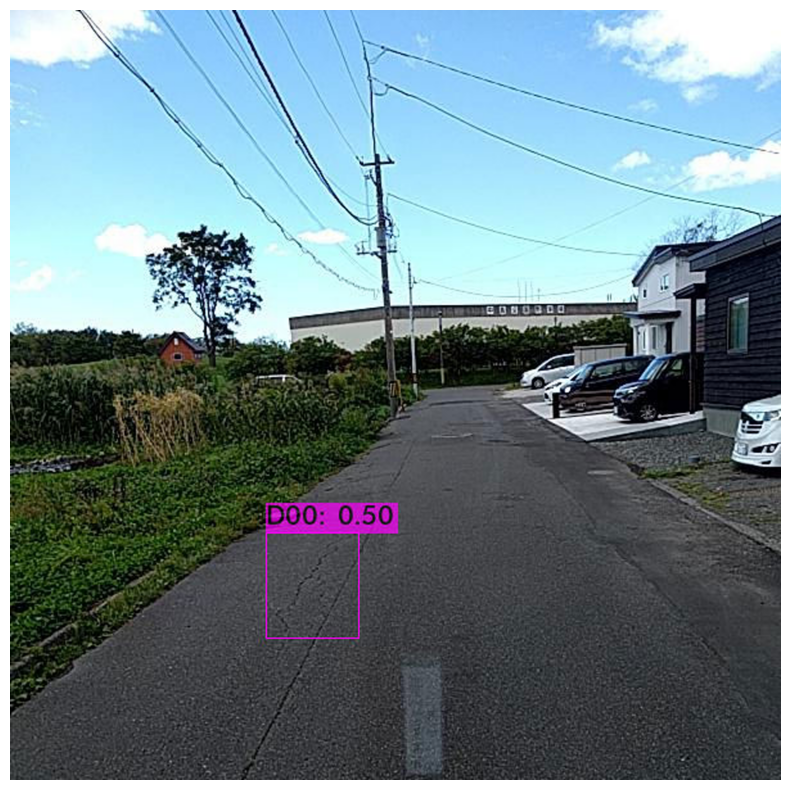

In [51]:
# run your custom detector with this command, thresh flag sets accuracy that detection must be in order to show it
!./darknet detector test /home/dmsai4/project/PortUAV/configs/obj.data /home/dmsai4/project/PortUAV/configs/yolov4-custom.cfg /home/dmsai4/project/PortUAV/training/yolov4-custom_last.weights /home/dmsai4/project/PortUAV/Data_India/test/Japan_011819.jpg -thresh 0.3
imShow('predictions.jpg')